In [1]:
import yfinance as yf

In [33]:
ks200 = yf.Ticker('^KS11')

In [34]:
ks200_df = ks200.history(start='2010-01-01', end='2019-01-01')

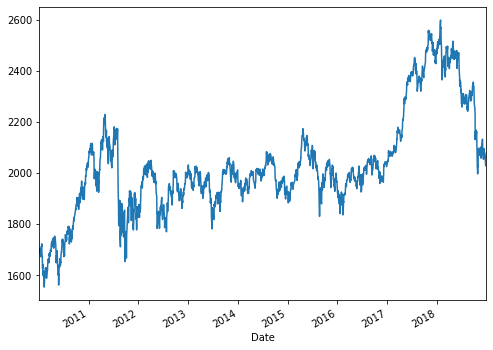

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(facecolor='w', figsize=(8, 6))
ks200_df['Close'].plot()

# FinanceDataReader

In [1]:
import FinanceDataReader as fdr
fdr.__version__

'0.8.0'

In [2]:
# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Name,Sector,Industry
0,155660,DSR,1차 비철금속 제조업,합섬섬유로프
1,001250,GS글로벌,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서..."
2,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
3,001390,KG케미칼,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제"
4,011070,LG이노텍,전자부품 제조업,기타 전자부품 제조업


In [25]:
ksfuture = fdr.DataReader('KS', '2017')
ks200 = fdr.DataReader('KS200', '2017')
ksvkospi = fdr.DataReader('KSVKOSPI', '2017')

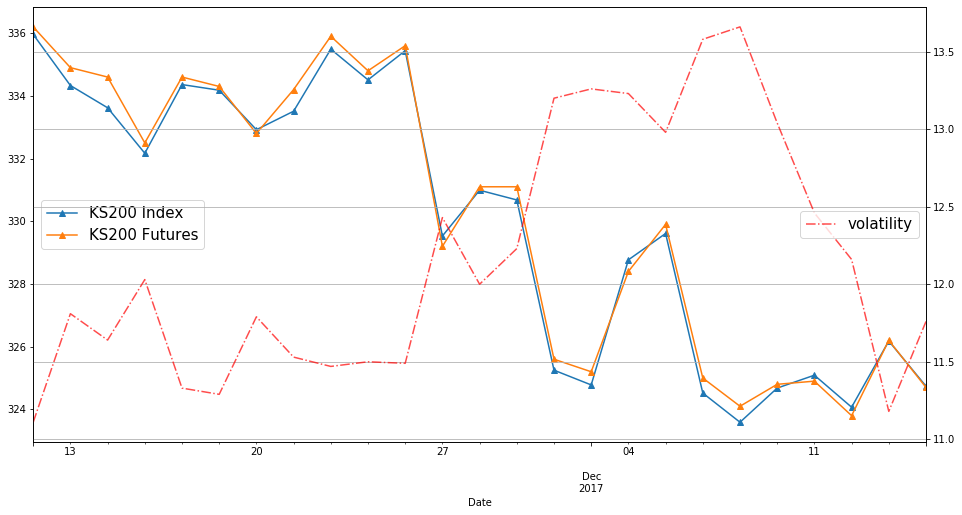

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 8), facecolor='w')
ax = plt.gca(); ax1 = ax.twinx()
ks200['Close'].loc['2017-11-10':'2017-12-14'].plot(ax=ax, label='KS200 Index', marker='^')
ksfuture['Close'].loc['2017-11-10':'2017-12-14'].plot(ax=ax, label='KS200 Futures', marker='^')
ksvkospi['Close'].loc['2017-11-10':'2017-12-14'].plot(ax=ax1, color='r', alpha=0.7, ls='-.', label='volatility')
# plt.figure(figsize=(16, 8), facecolor='w')
# ax = plt.gca(); ax1 = ax.twinx()
# ks200['Close'].plot(ax=ax, label='KS200 Index')
# ksfuture['Close'].plot(ax=ax, label='KS200 Futures')
# ksvkospi['Close'].plot(ax=ax1, color='r', alpha=0.7, ls='-.', label='volatility')
ax.legend(loc='center left', fontsize=15); ax1.legend(loc='center right', fontsize=15)
plt.grid(True); plt.show()

In [34]:
import pandas as pd
pd.concat((ks['Close'].loc['2017-11-10':'2017-12-14'], ks200['Close'].loc['2017-11-10':'2017-12-14']), axis=1).head()

,Close,Close
Date,,
2017-11-10,336.2,335.96
2017-11-13,334.9,334.33
2017-11-14,334.6,333.62
2017-11-15,332.5,332.17
2017-11-16,334.6,334.36


# Option
- C330 매도
- C335 매수
- C340 매도
- C345 매수
- P322.5 매도
- P330 매도

In [85]:
c330 =  pd.read_csv('c330.csv')
c335 =  pd.read_csv('c335.csv')
c340 =  pd.read_csv('c340.csv')
c345 =  pd.read_csv('c345.csv')
p3225 = pd.read_csv('p322.5.csv')
p330 =  pd.read_csv('p330.csv')

# Calc Greeks

## Black-Scholes Equation
- Black Scholes Formula
$$\cfrac{{\partial}f}{{\partial}t}+rS\cfrac{{\partial}f}{{\partial}S}+\cfrac{1}{2}{\sigma^2}{S^2}\cfrac{{\partial}^2f}{{\partial}S^2}=rf$$
- Call Option
$$C=max(S-K,0)$$
$$C(S,K,r,\sigma,t)\,=\,S\cdot{N(d_1)}-K{\cdot}e^{-r(T-t)}{\cdot}N(d_2)$$
- Put Call Parity
$$C+Ke^{-rt}=P+S$$
- Put Option
$$P=max(K-S,0)$$
$$P(S,K,r,\sigma,t)\,=\,K{\cdot}e^{-r(T-t)}{\cdot}N(-d_2)-S\cdot{N(-d_1)}$$
- Condition
$$\begin{align}
where{\quad}d_1&=\cfrac{ln{\frac{S}{K}+(r+0.5\sigma^2)(T-t)}}{\sigma\sqrt{T-t}}\\
d_2&=d_1-\sigma\sqrt{T-t}\\
N(x)&=\int_{-\infty}^{x}\cfrac{e^{-\frac{1}{2}y^2}}{\sqrt{2\pi}}dy
\end{align}$$

## Greeks
- Delta
$$\Delta_c=N(d_1)>0,\quad\Delta_p=-N(-d_1)<0$$
- Gamma
$$\Gamma_c=\cfrac{{\partial}^2C}{{\partial}S^2}=N^{\prime}(d_1)\cfrac{{\partial}d_1}{{\partial}S}=\cfrac{N^{\prime}(d_1)}{S\sigma\sqrt{T-t}}=\cfrac{{\partial}^2P}{{\partial}S^2}=\Gamma_p$$
- Theta
$$\Theta_c=\cfrac{{\partial}C}{{\partial}t}=-\cfrac{S{\sigma}N^{\prime}(d_1)}{2\sqrt{T-t}}-r{\cdot}Ke^{-r(T-t)}N(d_2)<0$$
$$\Theta_p=\cfrac{{\partial}P}{{\partial}t}=-\cfrac{S{\sigma}N^{\prime}(d_1)}{2\sqrt{T-t}}+r{\cdot}Ke^{-r(T-t)}N(-d_2)$$
- Vega
$$\begin{align}
\nu_c&=\cfrac{{\partial}C}{{\partial}\sigma}=S\sqrt{T-t}N(d_1)>0\\
&=\cfrac{{\partial}P}{{\partial}\sigma}=\nu_p
\end{align}$$
- Rho
$$\rho_c=\cfrac{{\partial}C}{{\partial}r}=(T-t)K^{-r(T-t)}N(d_2)>0$$
$$\rho_p=\cfrac{{\partial}P}{{\partial}r}=-(T-t)K^{-r(T-t)}N(-d_2)<0$$

In [99]:
import numpy as np

In [104]:
def choose_data(df):
    return df[df['일자'].map(lambda x : int(''.join(x.split('/'))) >= 20171110)].sort_index(ascending=False)
c330 = choose_data(c330)
c335 = choose_data(c335)
c340 = choose_data(c340)
c345 = choose_data(c345)
p3225 = choose_data(p3225)
p330 = choose_data(p330)

In [110]:
ks200 = ks200.loc['2017-11-10':'2017-12-14']
ksfuture = ksfuture.loc['2017-11-10':'2017-12-14']

In [148]:
from scipy.stats import norm

In [151]:
norm.cdf(5)

0.9999997133484281

In [230]:
0.015 + 0.5 * sigma ** 2

0.021171605

In [260]:
# r = 0.015
r = 0.0125
K = 330
S = ksfuture.loc['2017-11-10', 'Close']
T_t = (pd.Timestamp('2017-12-14') - pd.Timestamp('2017-11-10')).days / 365
sigma = ksvkospi.loc['2017-11-10', 'Close'] / 100
# sigma = 0.104073
d1 = ((np.log(S / K) + (r + 0.5 * sigma ** 2) * T_t)) / (sigma * np.sqrt(T_t))
Nd1 = norm.cdf(d1)
Nd1

0.7258236201395681

In [261]:
r = 0.0125
K = 335
S = ksfuture.loc['2017-11-10', 'Close']
T_t = (pd.Timestamp('2017-12-14') - pd.Timestamp('2017-11-10')).days / 365
sigma = ksvkospi.loc['2017-11-10', 'Close'] / 100
# sigma = 0.095751
d1 = ((np.log(S / K) + (r + 0.5 * sigma ** 2) * T_t)) / (sigma * np.sqrt(T_t))
Nd1 = norm.cdf(d1)
Nd1

0.5622770012473762

In [262]:
r = 0.0125
K = 340
S = ksfuture.loc['2017-11-10', 'Close']
T_t = (pd.Timestamp('2017-12-14') - pd.Timestamp('2017-11-10')).days / 365
sigma = ksvkospi.loc['2017-11-10', 'Close'] / 100
# sigma = 0.093031
d1 = ((np.log(S / K) + (r + 0.5 * sigma ** 2) * T_t)) / (sigma * np.sqrt(T_t))
Nd1 = norm.cdf(d1)
Nd1

0.3896734044976717

In [265]:
r = 0.0125
K = 345
S = ksfuture.loc['2017-11-10', 'Close']
T_t = (pd.Timestamp('2017-12-14') - pd.Timestamp('2017-11-10')).days / 365
sigma = ksvkospi.loc['2017-11-10', 'Close'] / 100
# sigma = 0.094073
d1 = ((np.log(S / K) + (r + 0.5 * sigma ** 2) * T_t)) / (sigma * np.sqrt(T_t))
Nd1 = norm.cdf(d1)
Nd1

0.23863293050044893

In [215]:
print(496.3215816 / 676)
print(946.211080513846 / 1692)
print(633.30724152 / 1692)
print(146.53572 / 676)

0.734203523076923
0.5592264069230768
0.37429506
0.21676881656804733


In [284]:
import datetime

In [314]:
'2017-11-10'.split('-')

['2017', '11', '10']

In [312]:
datetime.datetime(2017, 11, 10).weekday()

4

In [321]:
from datetime import datetime as dt
from datetime import timedelta
(dt(2017,11,10) + timedelta(1)).weekday()

5

In [339]:
dt.strptime('2017-11-10', "%Y-%m-%d")

datetime.datetime(2017, 11, 10, 0, 0)

In [281]:
import datetime.datetime as dt
from scipy.stats import norm

def normal_prime(x):
    return np.exp(-0.5 * x ** 2) / np.sqrt(2 * np.pi)

class OptionManager():
    
    def __init__(self, S, K, r, sigma, OptionType, start, ExpirationDate):
        self.S = S
        self.K = K
        self.r = r
        self.sigma = sigma
        assert OptionType in [0, 1], "Insert 0 : Call Option, 1 : Put Option"
        self.OptionType = OptionType
        self.date = dt.strptime(start, "%Y-%m-%d")
        self.Expiration = dt.strptime(ExpirationDate, "%Y-%m-%d")
        self.T_t = (self.Expiration - self.date).days / 365.0
        self.weekday = self.date.weekday()
        self.calc_greeks()
        
    def update(self, S, sigma, r=None):
        # update date
        if self.date.weekday() == 4:
            self.date += timedelta(3)
        else:
            self.date += timedelta(1)
        self.T_t = (self.Expiration - self.date).days / 365.0
        self.weekday = self.date.weekday()
        # set new parameter
        self.S = S
        self.sigma = sigma
        if r: self.r = r
        self.calc_greeks()
    
    def calc_greeks(self):
        self.d1 = self.get_d1()
        self.d2 = self.get_d2()
        self.delta = self.get_delta()
        self.gamma = self.get_gamma()
        self.theta = self.get_theta()
        self.vega = self.get_vega()
        self.rho = self.get_rho()
    
    def get_d1(self):
        d1 = ((np.log(self.S / self.K) + \
             (self.r + 0.5 * self.sigma ** 2) * T_t)) \
             / (self.sigma * np.sqrt(T_t))
        return d1
    
    def get_d2(self):
        return self.d1 - self.sigma * np.sqrt(self.T_t)
    
    def get_delta(self):
        delta = norm.cdf(self.d1)
        if self.OptionType == 1: delta -= 1
        return delta
    
    def get_gamma(self):
        gamma = normal_prime(self.d1) / (self.S * self.sigma * np.sqrt(self.T_t))
        return gamma
    
    def get_theta(self):
        optiontype = 1 if self.OptionType == 0 else -1
        term1 = - self.S * self.sigma * normal_prime(self.d1) / (2 * np.sqrt(self.T_t))
        term2 = - self.r * self.K * np.exp(-self.r * self.T_t) * optiontype
        term3 = norm.cdf(self.d2 * optiontype)
        return term1 + term2 * term3
    
    def get_vega(self):
        return self.S * np.sqrt(self.T_t) * norm.cdf(self.d1)
    
    def get_rho(self):
        optiontype = 1 if self.OptionType == 0 else -1
        return optiontype * self.T_t * self.K * np.exp(-self.r * self.T_t) \
            * norm.cdf(self.d2 * optiontype)